# Distribution Plots
* Plot visualisation types for the distribution of a data set:
    * displot
    * jointplot
    * pairplot
    * rugplot
    * kdeplot
* Seaborn API documentation: https://seaborn.pydata.org/api.html
* Seaborn colour palette keywords and list: https://seaborn.pydata.org/tutorial/color_palettes.html
___

Note: Seaborn provides built-in datasets for learning such as the example below with 'tips'.

In [1]:
# Library Import + Data Load
import seaborn as sns
%matplotlib inline

t = sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


___
## displot
* The distplot shows the distribution of a univariate set of observations.

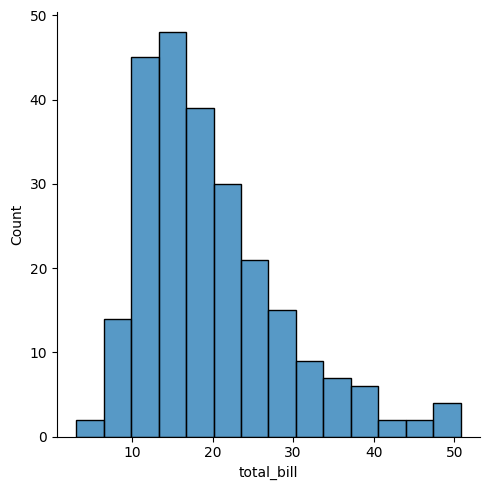

In [2]:
sns.displot(t['total_bill'])
# Safe to ignore warnings

* Below: A histogram without the kde layer.

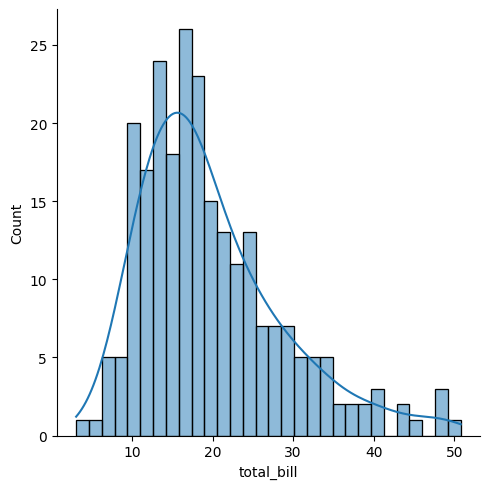

In [3]:
sns.displot(t['total_bill'], kde=True, bins=30)

___
## jointplot
jointplot() matches up two distplots for bivariate data. Parameter types for comparisons: 
* 'scatter'
* 'reg' 
* 'resid' 
* 'kde'
* 'hex'

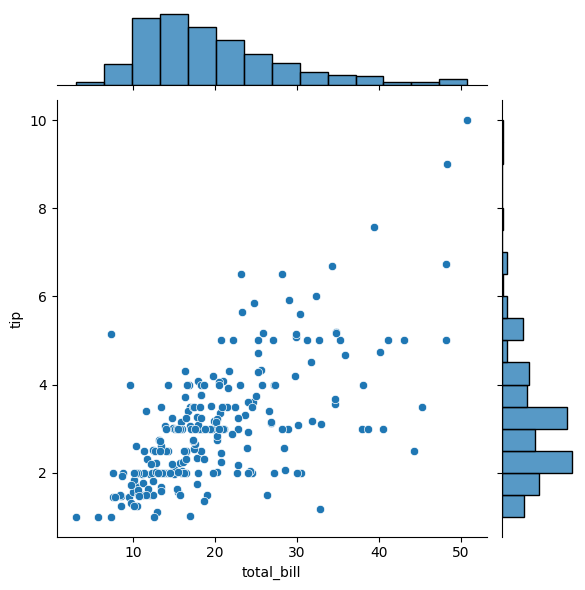

In [4]:
sns.jointplot(data=t, kind='scatter', x='total_bill', y='tip')

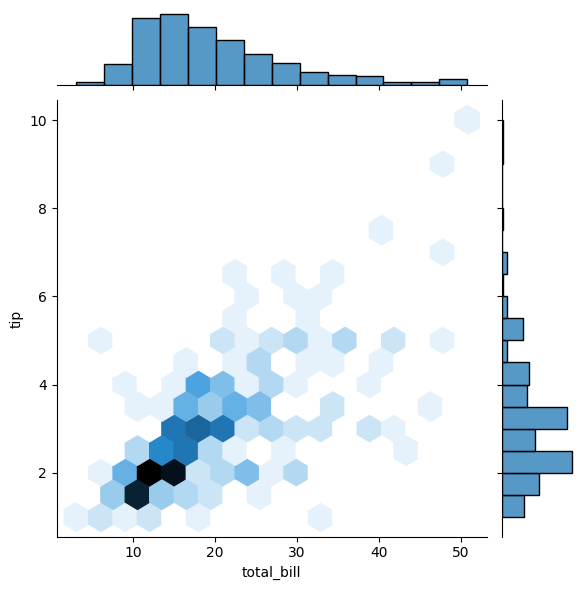

In [5]:
sns.jointplot(data=t, kind='hex', x='total_bill', y='tip')

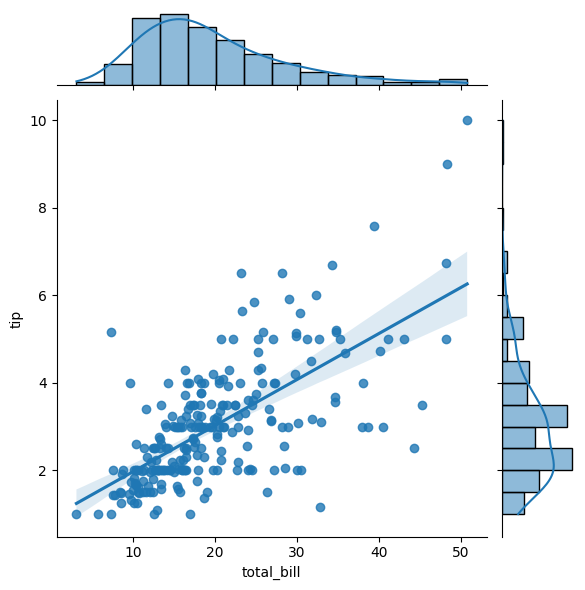

In [6]:
sns.jointplot(data=t, kind='reg', x='total_bill', y='tip')

___
## pairplot
* pairplot shows pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

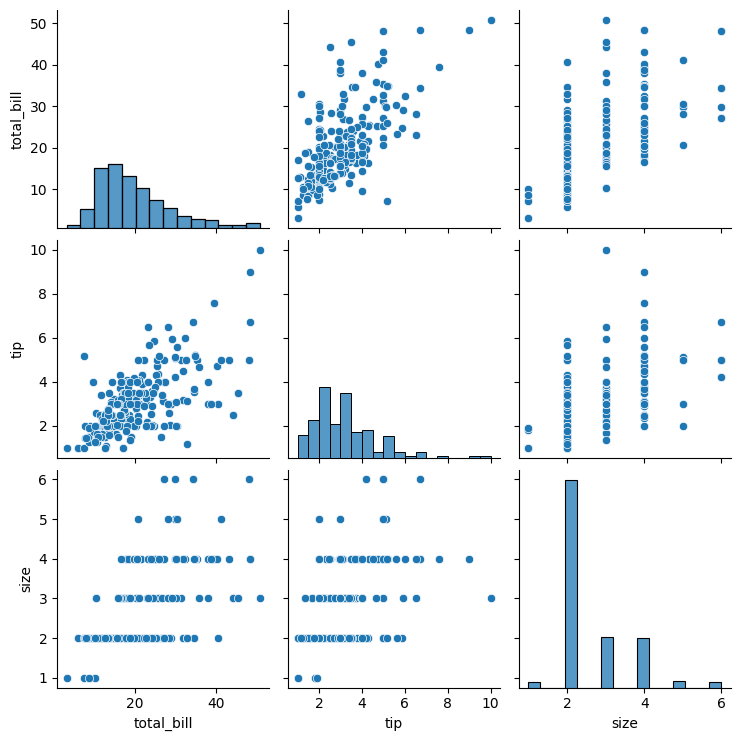

In [8]:
sns.pairplot(t)

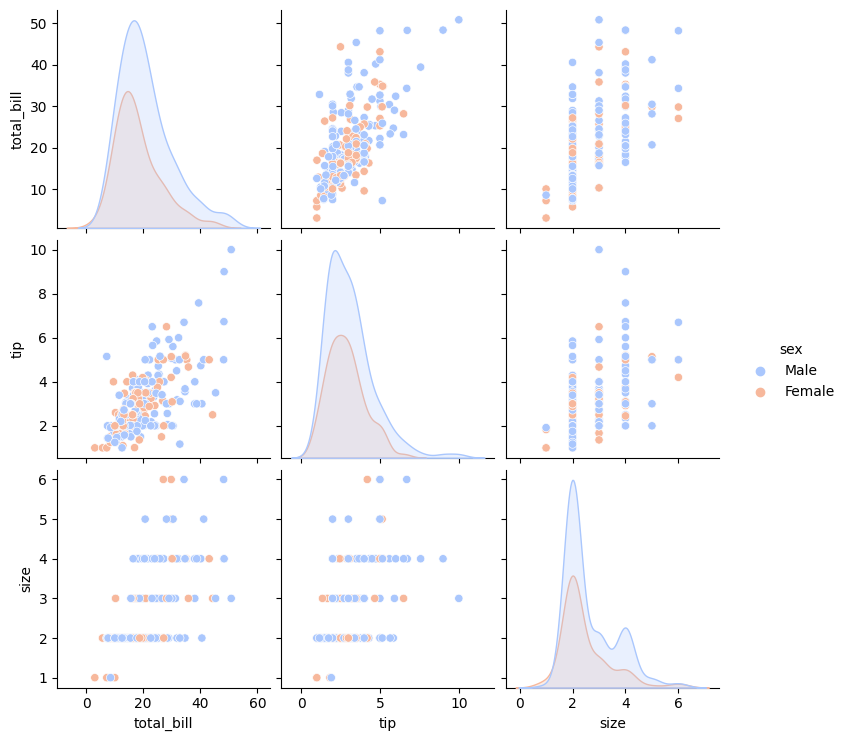

In [9]:
sns.pairplot(t, hue='sex', palette='coolwarm')

___
## rugplot
* Rugplots draw a dash mark for every point on a univariate distribution. These are the building blocks of a KDE plot:

<Axes: xlabel='total_bill'>

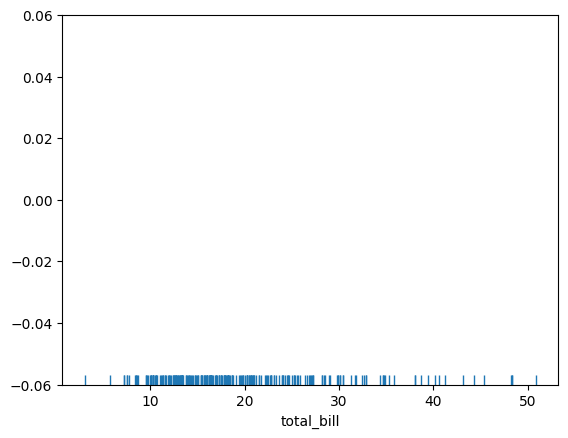

In [10]:
sns.rugplot(t['total_bill'])

___
## kdeplot
* kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). 
* KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

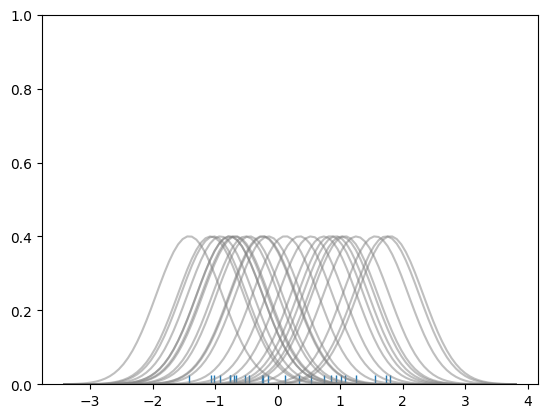

In [11]:
# The example involves with stastics import from the scipy library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernellist = []

# Plot each basis function
for dp in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(dp,bandwidth).pdf(x_axis)
    kernellist.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

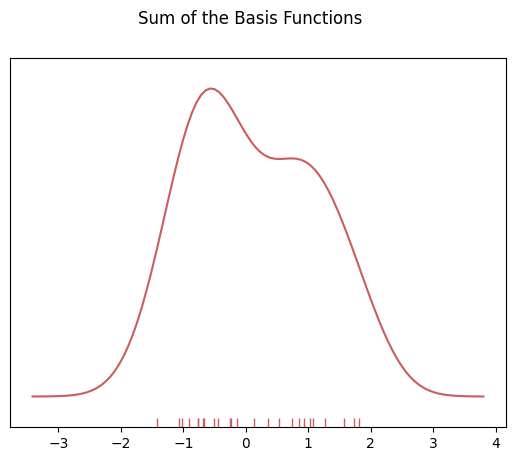

In [12]:
# Sum these basis functions to obtain the kde plot.

# Plot the sum of the basis function
kdesum = np.sum(kernellist,axis=0)

# Plot figure
fig = plt.plot(x_axis,kdesum,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

___
kde plot for the example dataset, t:

<Axes: xlabel='total_bill', ylabel='Density'>

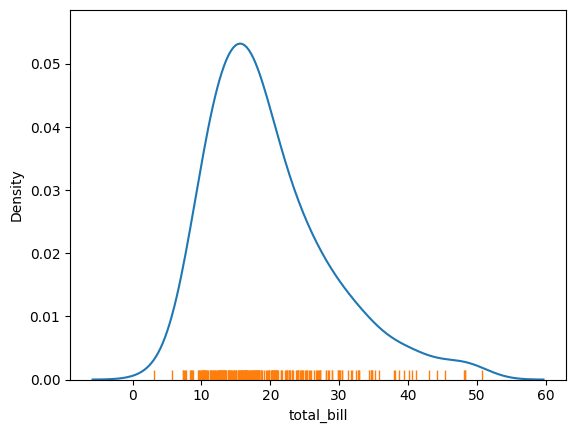

In [13]:
sns.kdeplot(t['total_bill'])
sns.rugplot(t['total_bill'])

<Axes: xlabel='tip', ylabel='Density'>

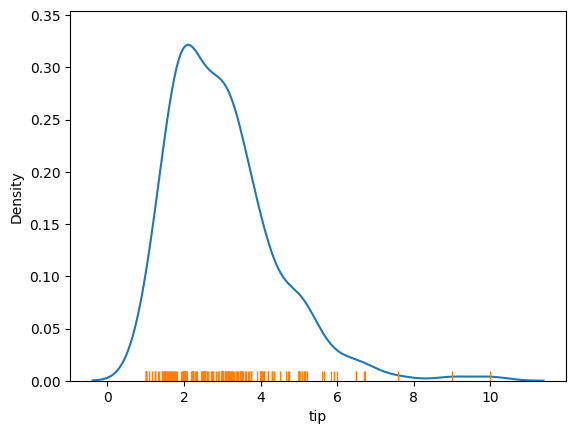

In [14]:
sns.kdeplot(t['tip'])
sns.rugplot(t['tip'])

___